Đề bài 3:

Problem Statement:
- Bộ dữ liệu được cung cấp bởi Olist, một tập đoàn siêu thị lớn nhất ở Brazil. Olist kết nối các doanh nghiệp nhỏ từ khắp Brazil với các kênh bán hàng một cách dễ dàng thông qua một hợp đồng duy nhất. Những người bán hàng này có thể bán sản phẩm của mình thông qua cửa hàng của Olist và vận chuyển trực tiếp đến khách hàng bằng cách sử dụng các đối tác hậu cần của Olist. 
- Sau khi khách hàng mua sản phẩm từ Olist Store, người bán sẽ nhận được thông báo thực hiện đơn hàng đó. Sau khi khách hàng nhận được sản phẩm hoặc đến hạn giao hàng dự kiến, khách hàng sẽ nhận được một bản khảo sát về mức độ hài lòng qua email, nơi họ có thể đưa ra ghi chú về trải nghiệm mua hàng và viết ra một số nhận xét.

Objective: 
- Bạn được yêu cầu chuẩn bị một bản báo cáo về việc xác định các phân khúc khách hàng của Olist và đề xuất các nhu cầu sản phẩm của từng cụm khách hàng đó. Bản báo cáo của bạn sẽ được team Marketing sử dụng để tối ưu hoá lại việc tiếp thị qua Ads và team Dev sẽ xây dựng các hệ thống đề xuất phù hợp hơn với nhu cầu sử dụng của khách hàng. 


In [ ]:
import pandas as pd
import numpy as np
#Đọc dữ liệu từ các file CSV
custs = pd.read_csv('Dataset_Olist/olist_customers_dataset.csv')
ords = pd.read_csv('Dataset_Olist/olist_orders_dataset.csv')
items = pd.read_csv('Dataset_Olist/olist_order_items_dataset.csv')
prods = pd.read_csv('Dataset_Olist/olist_products_dataset.csv')
reviews = pd.read_csv('Dataset_Olist/olist_order_reviews_dataset.csv')
trans = pd.read_csv('Dataset_Olist/product_category_name_translation.csv')

In [2]:
custs.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
ords.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


I. XỬ LÝ TIỀN DỮ LIỆU, EDA chuyên sâu:

In [ ]:
# Xây dựng cái nhìn toàn diện (360-degree view) về khách hàng bằng cách kết hợp thông tin nhân khẩu học với lịch sử giao dịch và phương thức thanh toán.
# Kết nối Khách hàng với Đơn hàng (để lấy customer_unique_id)
df = custs.merge(ords, on='customer_id', how='inner')
# Kết nối với Chi tiết đơn hàng (để lấy giá và phí ship)
df = df.merge(items, on='order_id', how='inner')
# Kết nối với Sản phẩm và Bản dịch tiếng Anh
df = df.merge(prods, on='product_id', how='left')
df = df.merge(trans, on='product_category_name', how='left')
# Kết nối với Đánh giá (Reviews)
df = df.merge(reviews[['order_id', 'review_score']], on='order_id', how='left')

In [5]:
# Lọc các đơn hàng đã hoàn thành
df = df[df['order_status'] == 'delivered']
# Chọn các cột quan trọng cho phân khúc khách hàng và hệ thống gợi ý
important_cols = [
    'customer_unique_id', 'order_id', 'order_purchase_timestamp', 
    'price', 'freight_value', 'product_id', 
    'product_category_name_english', 'review_score',
    'customer_city', 'customer_state'
]
df = df[important_cols]

# Chuyển đổi định dạng ngày tháng
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

print(f"Hợp nhất hoàn tất! Kích thước bảng: {df.shape}")
print(df.head())

Hợp nhất hoàn tất! Kích thước bảng: (110840, 10)
                 customer_unique_id                          order_id  \
0  861eff4711a542e4b93843c6dd7febb0  00e7ee1b050b8499577073aeb2a297a1   
1  290c77bc529b7ac935b93aa66c333dc3  29150127e6685892b6eab3eec79f59c7   
2  060e732b5b29e8181a18229c7b0b2b5e  b2059ed67ce144a36e2aa97d2c9e9ad2   
3  259dac757896d24d7702b9acbbff3f3c  951670f92359f4fe4a63112aa7306eba   
4  345ecd01c38d18a9036ed96c73b8d066  6b7d50bd145f6fc7f33cebabd7e49d0f   

  order_purchase_timestamp   price  freight_value  \
0      2017-05-16 15:05:35  124.99          21.88   
1      2018-01-12 20:48:24  289.00          46.48   
2      2018-05-19 16:07:45  139.94          17.79   
3      2018-03-13 16:06:38  149.94          23.36   
4      2018-07-29 09:51:30  230.00          22.25   

                         product_id product_category_name_english  \
0  a9516a079e37a9c9c36b9b78b10169e8              office_furniture   
1  4aa6014eceb682077f9dc4bffebc05b0                    

In [6]:
df_process = df.copy()
# Xử lý giá trị thiếu
df_process['review_score'].fillna(df_process['review_score'].median(), inplace=True)
df_process['product_category_name_english'].fillna('unknown', inplace=True)


C:\Users\Acer\AppData\Local\Temp\ipykernel_22900\1570860605.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_process['review_score'].fillna(df_process['review_score'].median(), inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_22900\1570860605.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

1. Tại sao lại EDA Bang (Customer State)?
- Mục đích: Phục vụ Phần 6: Chiến lược Vận hành.
- Lý do: Olist là một nền tảng kết nối người bán và người mua khắp Brazil. Brazil là một quốc gia rộng lớn với chi phí vận chuyển cực kỳ đắt đỏ giữa các bang.
- Insight thu được: Nếu 70% khách hàng nằm ở Sao Paulo (SP) nhưng phần lớn người bán lại ở phía Bắc, chi phí ship sẽ "đốt cháy" lợi nhuận. Khi EDA cái này, ní sẽ biết được nên kiến nghị team Dev tối ưu hiển thị người bán gần khách hàng nhất để giảm phí ship và thời gian giao hàng.

2. Tại sao lại EDA Price vs Freight Value (Phí ship)?
- Mục đích: Giải thích về Hành vi rời bỏ (Churn) và Tính hợp lý của giá.
- Lý do: Khách hàng TMĐT rất nhạy cảm với phí ship. Có những món hàng giá chỉ 10$ nhưng phí ship lên tới 20$ -> khách sẽ không bao giờ quay lại.
- Insight thu được: Nếu biểu đồ Scatter plot cho thấy một cụm khách hàng đang chịu phí ship quá cao so với giá trị món hàng, đây chính là nhóm "At Risk" (Nguy cơ rời bỏ) ở Phần 6. Ní sẽ dùng cái này để kiến nghị chiến lược "Freeship cho đơn hàng trên X đồng" để cứu vãn tỷ lệ chuyển đổi.

3. Tại sao lại EDA Review Score?
- Mục đích: Phục vụ Phần 5: Hệ thống gợi ý và Phần 6: Chăm sóc khách hàng.
- Lý do: Đây là chỉ số quan trọng nhất để đánh giá "chất lượng" của một phân khúc.
- Insight thu được: 
    + Nếu một cụm khách hàng (ví dụ cụm VIP) có điểm review thấp, ní phải báo động ngay vì doanh nghiệp đang làm mất lòng những người mang lại nhiều tiền nhất.
    + Trong hệ thống gợi ý, ní chỉ nên gợi ý những sản phẩm có Review Score cao. EDA cái này giúp ní xác định ngưỡng (Threshold) lọc sản phẩm (ví dụ: chỉ gợi ý món > 4 sao).


In [7]:
df_process.head()

,customer_unique_id,order_id,order_purchase_timestamp,price,freight_value,product_id,product_category_name_english,review_score,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99,21.88,a9516a079e37a9c9c36b9b78b10169e8,office_furniture,4.0,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00,46.48,4aa6014eceb682077f9dc4bffebc05b0,housewares,5.0,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94,17.79,bd07b66896d6f1494f5b86251848ced7,office_furniture,5.0,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94,23.36,a5647c44af977b148e0a3a4751a09e2e,office_furniture,5.0,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00,22.25,9391a573abe00141c56e38d84d7d5b3b,home_confort,5.0,campinas,SP


C:\Users\Acer\AppData\Local\Temp\ipykernel_22900\2306731459.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')


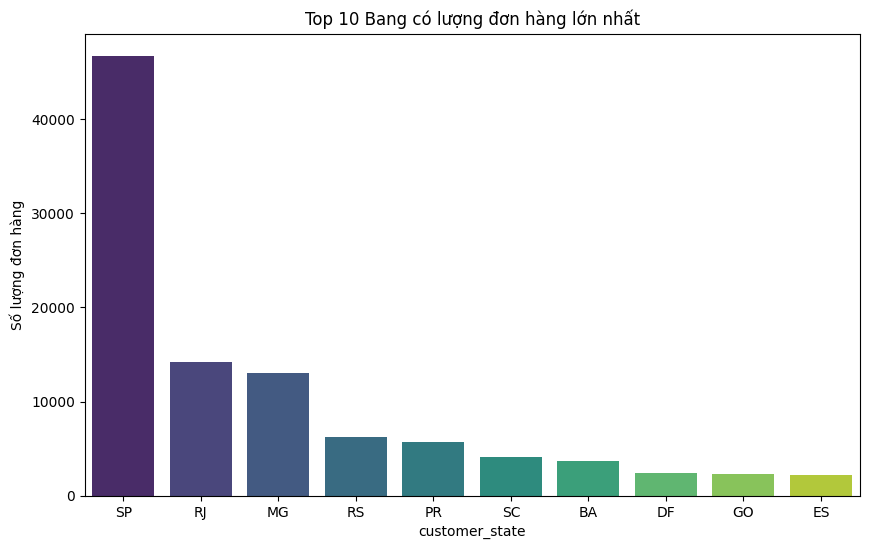

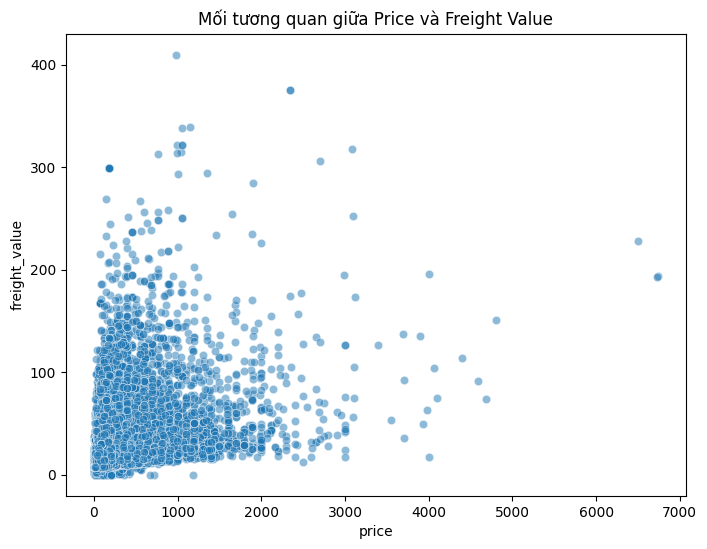

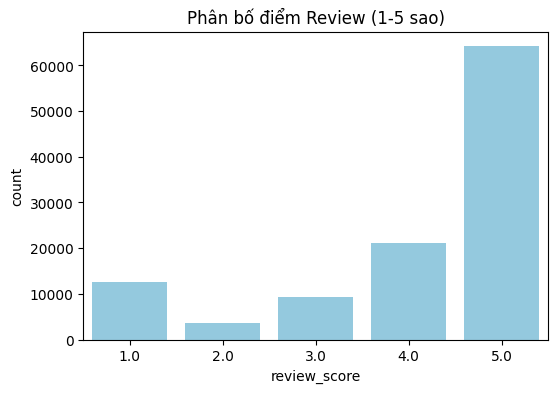

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# EDA 1: Phân phối số lượng đơn hàng theo Bang (Top 10)
plt.figure(figsize=(10, 6))
top_states = df_process['customer_state'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.title('Top 10 Bang có lượng đơn hàng lớn nhất')
plt.ylabel('Số lượng đơn hàng')
plt.show()

# EDA 2: Tương quan giữa Giá tiền (Price) và Phí Ship (Freight Value)
# Điều này giúp hiểu xem phí ship có đang quá cao so với giá trị món hàng không
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_process, x='price', y='freight_value', alpha=0.5)
plt.title('Mối tương quan giữa Price và Freight Value')
plt.show()
    
# EDA 3: Thống kê Review Score
plt.figure(figsize=(6, 4))
sns.countplot(data=df_process, x='review_score', color='skyblue')
plt.title('Phân bố điểm Review (1-5 sao)')
plt.show()

ĐÁNH GIÁ BIỂU ĐỒ:
1. Phân phối số lượng đơn hàng theo Bang (Top 10)
- Hiện trạng: 
    + Sự thống trị tuyệt đối của Sao Paulo (SP): Bang SP chiếm thị phần áp đảo với hơn 40,000 đơn hàng, bỏ xa hoàn toàn các bang còn lại. Cột dữ liệu của SP cao gấp khoảng 3 lần so với bang đứng thứ hai.
    + Nhóm "Á quân" (RJ & MG): Rio de Janeiro (RJ) và Minas Gerais (MG) lần lượt giữ vị trí số 2 và 3 với khoảng 12,000 - 15,000 đơn hàng.
    + Nhóm "Đuôi dài" (Long-tail): Từ vị trí thứ 4 trở đi (RS, PR, SC...), số lượng đơn hàng giảm sâu xuống dưới mức 7,000 và chênh lệch không quá nhiều giữa các bang này.
- Phân tích:
    + Tập trung địa lý (Geographical Concentration): Ba bang dẫn đầu (SP, RJ, MG) đều nằm ở vùng Đông Nam (Southeast) của Brazil. Đây là trung tâm kinh tế và đông dân nhất. Điều này cho thấy Olist đang phụ thuộc rất lớn vào khu vực này.
    + Quy luật Pareto (80/20): Biểu đồ thể hiện rõ quy luật 80/20, nơi phần lớn doanh thu đến từ một nhóm nhỏ khách hàng tại SP. Đây vừa là thế mạnh (tập trung nguồn lực dễ) vừa là rủi ro (nếu mất thị phần ở SP, doanh nghiệp sẽ lao đao).
    + Vấn đề Logistics: Với sự chênh lệch này, chi phí vận chuyển (Freight Value) và thời gian giao hàng (Delivery Time) đến các bang xa (như BA - Bahia ở Đông Bắc) chắc chắn sẽ cao hơn và lâu hơn nhiều so với SP, tạo ra rào cản mua hàng tự nhiên.
- Kiến nghị:
    
    + ưu tiên đặt kho tổng hoặc trung tâm xử lý đơn hàng chính tại SP để tối ưu hóa thời gian giao hàng cho 40,000+ khách hàng này.
    + Mở rộng kho phụ: Cân nhắc thiết lập kho vệ tinh tại RJ và MG để giảm tải cho SP và giảm chi phí ship liên bang.
    + Phân biệt chính sách: Không thể áp dụng cùng một chương trình khuyến mãi cho cả nước.
        - Tại SP: Cạnh tranh bằng tốc độ giao hàng ("Giao trong 24h") vì logistics đã tốt.
        - Tại các bang xa (Top 4-10): Cạnh tranh bằng trợ giá vận chuyển ("Mã Freeship tối đa 50k") để xóa bỏ rào cản phí ship cao.
    + Targeting: Tập trung ngân sách Ads lớn nhất vào bộ ba SP-RJ-MG để tối đa hóa tỷ lệ chuyển đổi (ROAS) thay vì rải tiền quảng cáo ở các bang có nhu cầu thấp.

2. Tương quan giữa Giá tiền (Price) và Phí Ship (Freight Value)
- Hiện trạng: 
    + Mật độ tập trung (Density): Đại đa số các điểm dữ liệu (đơn hàng) tập trung dày đặc ở góc dưới bên trái, nơi Price < 500 và Freight Value < 50. Điều này cho thấy Olist chủ yếu bán các mặt hàng giá trị trung bình thấp và phí ship chấp nhận được.
    + Không có tuyến tính rõ ràng (Non-linear relationship): Dữ liệu phân tán thành hình "đám mây" chứ không tạo thành một đường thẳng rõ nét. Điều này chứng tỏ: Giá tiền không phải là yếu tố chính quyết định phí ship (mà thường là cân nặng hoặc khoảng cách).
    + Sự xuất hiện của "Vùng phi lý" (The Irrational Zone): nhìn vào trục X ở khoảng giá trị thấp (0 - 100). Có rất nhiều điểm dữ liệu mà phí ship vọt lên cao (50 - 100, thậm chí 200). Tức là có những đơn hàng Phí ship ngang ngửa hoặc đắt hơn cả giá trị món hàng.
- Phân tích:
    + Rào cản tâm lý:
        - Khách hàng cực kỳ ghét việc phải trả tiền ship quá cao so với giá trị món hàng.
        - Những điểm dữ liệu có tỷ lệ Freight / Price > 50% là những đơn hàng có nguy cơ hủy đơn hoặc rời bỏ (Churn) cao nhất. Nếu khách hàng vẫn mua, có thể vì món đó cực hiếm hoặc họ đang rất cần, nhưng trải nghiệm chắc chắn không vui vẻ.
    + Nguyên nhân của phí ship cao:
        - Do khoảng cách địa lý (như đã thấy ở biểu đồ Bang trước đó, ship từ SP đi các bang xa).
        - Do đặc thù sản phẩm: Hàng giá rẻ nhưng cồng kềnh/nặng (ví dụ: tạ tập tay, nội thất lắp ghép giá rẻ).
    + Cơ hội từ hàng giá trị cao: phí ship vẫn dao động nhưng tỷ lệ Freight / Price trở nên rất nhỏ (ví dụ món 3000 ship 100 thì chỉ chiếm 3%). Đây là nhóm khách hàng ít nhạy cảm về giá ship nhưng sẽ rất nhạy cảm về thời gian giao hàng.
- Kiến nghị:

    + Nhìn vào đám mây dày đặc ở góc trái, Olist có thể triển khai gói thành viên kiểu "Olist Prime" (trả phí tháng để được Freeship cho các đơn dưới 500 đơn vị tiền tệ). Đây là cách kiếm tiền cực tốt từ nhóm khách hàng mua lặt vặt thường xuyên.
    + Hành động: Tạo các Combo (ví dụ: "Mua 3 món giảm 50% phí ship") hoặc quy định Giá trị đơn hàng tối thiểu (Minimum Order Value) để được hỗ trợ phí ship. Mục tiêu là làm cho tỷ lệ Freight / Price giảm xuống mức tâm lý chấp nhận được (dưới 10-15%).
    + Lọc ra các đơn hàng ở "Vùng phi lý" (Ship > Giá) để kiểm tra xem có phải do lỗi tính toán trọng lượng (Weight Dimension) hay không. Nếu không phải lỗi, cần tìm đối tác vận chuyển chuyên biệt cho hàng cồng kềnh giá rẻ để tối ưu chi phí.

3. Thống kê Review Score
- Hiện trạng: 
    + Điểm 5 chiếm ưu thế tuyệt đối: Có hơn 60,000 lượt đánh giá 5 sao, cho thấy đại đa số khách hàng trên sàn Olist có trải nghiệm mua sắm cực kỳ hài lòng.
    + Xu hướng tích cực: Tổng lượng điểm 4 và 5 chiếm tỷ trọng lớn nhất, chứng tỏ uy tín dịch vụ của sàn đang ở mức tốt.
    + Điểm 1 sao cao bất thường: Một điểm đáng lưu ý là số lượng đánh giá 1 sao (hơn 10,000 lượt) cao hơn hẳn so với điểm 2 sao (thấp nhất) và 3 sao.
    + Khoảng trống ở giữa: Điểm 2 và 3 có số lượng khá thấp, cho thấy khách hàng ít khi để lại phản hồi nếu trải nghiệm chỉ ở mức "trung bình" hoặc "tạm chấp nhận được".
- Phân tích:
    + Hiệu ứng phân cực (Polarization): Khách hàng có xu hướng để lại đánh giá rõ rệt nhất khi họ cảm thấy cực kỳ hạnh phúc (5 sao) hoặc cực kỳ bức xúc (1 sao).
    + Nút thắt nghiêm trọng: Việc điểm 1 sao cao hơn điểm 2 và 3 chứng tỏ những khách hàng này không chỉ "hơi không hài lòng" mà họ đang gặp phải những sự cố nghiêm trọng (ví dụ: không nhận được hàng, hàng vỡ nát, hoặc sai lệch hoàn toàn so với mô tả).
    + Độ tin cậy của hệ thống gợi ý: Dữ liệu này là "nguyên liệu" quý giá để xây dựng hàm $g$ trong phương trình tính điểm sản phẩm, giúp lọc ra những sản phẩm có nguy cơ gây thất vọng cho người dùng.
- Kiến nghị:

    + Ưu tiên đẩy các sản phẩm có điểm trung bình từ 4.5 đến 5.0 lên đầu danh sách gợi ý để đảm bảo tỷ lệ chuyển đổi và uy tín cho sàn.
    + Tự động loại bỏ hoặc cảnh báo các sản phẩm có tỷ lệ đánh giá 1 sao vượt quá một ngưỡng nhất định (ví dụ > 10%) khỏi hệ thống đề xuất.
    + Lọc ra những khách hàng trong các cụm "Champions" hoặc "Loyal" vừa đánh giá 1 sao để đội ngũ CSKH liên hệ xử lý ngay lập tức (Win-back strategy).
    + Kết hợp dữ liệu đánh giá này với thông tin về Bang (State) và Phí ship (Freight Value) từ các biểu đồ trước để xem liệu nhóm 1 sao có tập trung ở các bang xa hay do phí ship quá cao hay không.
    + Kết hợp dữ liệu đánh giá này với thông tin về Bang (State) và Phí ship (Freight Value) từ các biểu đồ trước để xem liệu nhóm 1 sao có tập trung ở các bang xa hay do phí ship quá cao hay không

II. PHÂN KHÚC KHÁCH HÀNG VÀ CHUẨN BỊ CHO VIỆC HUẤN LUYỆN MÔ HÌNH:

Kiểm định tính bền vững (Stability): 
- Trong Machine Learning thông thường, ta chia Train/Test ngẫu nhiên (Random Split). Nhưng trong phân cụm, nếu chia ngẫu nhiên, cấu trúc dữ liệu của 2 tập sẽ y hệt nhau -> Kết quả luôn tốt nhưng không thực tế.
- Giả lập quá khứ - tương lai:
    + Train (2017): Dạy mô hình nhận diện thế nào là khách VIP dựa trên hành vi năm 2017.
    + Test (2018): Ní áp dụng "bộ quy tắc" của 2017 vào năm 2018. Nếu kết quả cho thấy nhóm VIP 2018 vẫn có sức mua cao và hành vi tương tự 
    -> Mô hình bền vững theo thời gian, có thể mang đi triển khai thực tế.

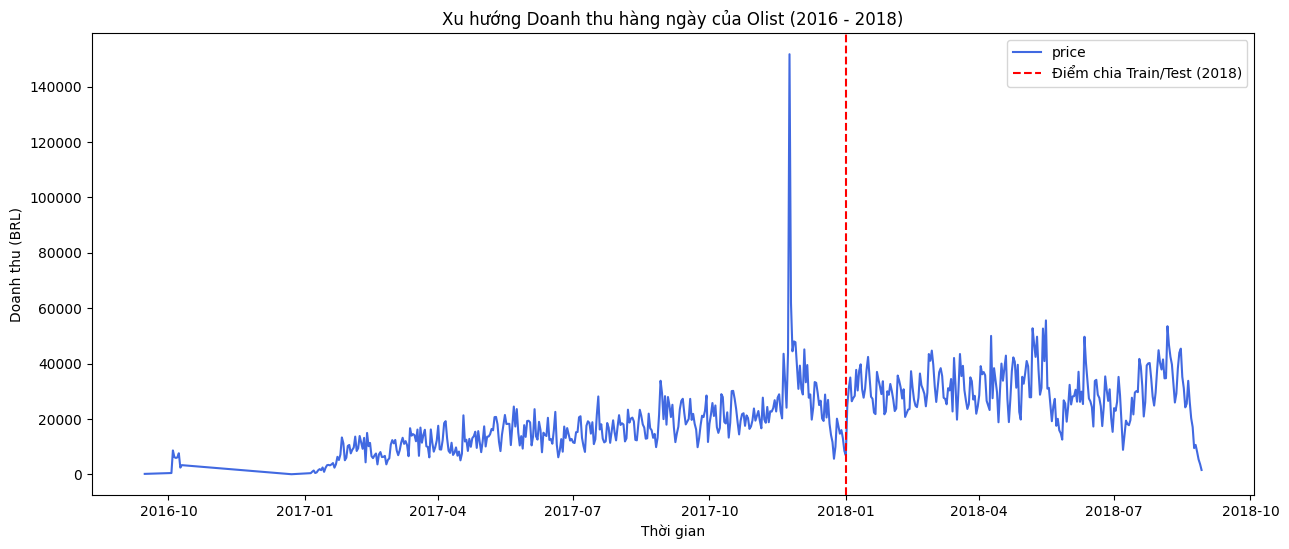

In [9]:
# Kiểm tra tính bền vững của doanh thu theo thời gian
# Tính doanh thu theo từng ngày
daily_revenue = df_process.groupby(df_process['order_purchase_timestamp'].dt.date)['price'].sum()
# Vẽ biểu đồ xu hướng doanh thu theo thời gian
plt.figure(figsize=(15, 6))
daily_revenue.plot(color='royalblue')
plt.axvline(pd.Timestamp('2018-01-01'), color='red', linestyle='--', label='Điểm chia Train/Test (2018)')
plt.title('Xu hướng Doanh thu hàng ngày của Olist (2016 - 2018)')
plt.ylabel('Doanh thu (BRL)')
plt.xlabel('Thời gian')
plt.legend()
plt.show()

ĐÁNH GIÁ:
1. Hiện trạng:
- Giai đoạn khởi động (2016): Doanh thu gần như bằng 0 và dữ liệu rất thưa thớt. Điều này cho thấy giai đoạn này không đủ dày để đưa vào huấn luyện mô hình phân cụm.
- Giai đoạn tăng trưởng (2017): Doanh thu bắt đầu tăng trưởng ổn định từ đầu năm và bùng nổ mạnh mẽ vào cuối năm.
- Điểm đột biến (Spike): Có một cột doanh thu vọt lên cực cao (xấp xỉ 150,000 BRL) vào khoảng tháng 11/2017—đây chính là ngày Black Friday.
- Giai đoạn ổn định (2018): Sau khi bước sang năm 2018, doanh thu duy trì ở một "nền" cao hơn hẳn so với đầu năm 2017, thể hiện sự trưởng thành của sàn Olist.
2. Phân tích:
- Chia dữ liệu: chọn ngày 01/01/2018 làm ranh giới giữa Train và Test, vì:
    + Năm 2017: Chứa đựng toàn bộ quá trình tăng trưởng và các đợt mua sắm lớn nhất năm. Mô hình sẽ học được cách nhận diện "VIP" dựa trên các hành vi mua sắm đỉnh điểm.
    + Năm 2018: Có khối lượng đơn hàng đủ lớn và đều đặn để kiểm chứng xem các nhóm khách hàng được phân loại từ 2017 có còn giữ vững phong độ không.
- Rủi ro từ Outlier: Cú spike Black Friday 2017 có thể khiến chỉ số Monetary (M) và Frequency (F) của một nhóm khách hàng bị vọt lên quá cao so với mặt bằng chung. Nếu không xử lý, K-Means sẽ hiểu nhầm đây là một phân cụm siêu VIP riêng biệt nhưng thực chất họ chỉ mua một lần vào dịp sale.
- Data Drift: Doanh thu năm 2018 cao hơn và ổn định hơn 2017, điều này thách thức tính bền vững của mô hình. Nếu tâm cụm (Centroids) của 2017 quá khác so với 2018, chúng ta sẽ thấy rõ hiện tượng trôi dạt dữ liệu ngay lập tức
3. Xử lý sự chênh lệch của 2017:
- Xử lý Log Transformation: Do biểu đồ có sự chênh lệch quá lớn giữa ngày thường và ngày sale (Black Friday), việc áp dụng log(x+1) là bắt buộc để nén các giá trị cực lớn, giúp các chỉ số RFM trở về phân phối chuẩn hơn.
- Focus vào 2017-2018: Nên cân nhắc loại bỏ dữ liệu năm 2016 khỏi tập Train vì độ nhiễu cao và số lượng đơn hàng quá ít không mang lại giá trị học tập cho mô hình.
- Xây dựng "Hồ sơ khách hàng" (Profiling): Khi gán nhãn cho 2018, hãy đặc biệt chú ý đến nhóm khách hàng xuất hiện ở cả 2 năm.
- Kiểm tra tính mùa vụ (Seasonality): Vì năm 2017 có đỉnh cao vào tháng 11, hãy kiểm tra xem tập Test 2018 có các đỉnh tương tự không để đảm bảo các đề xuất sản phẩm từ Team Dev diễn ra đúng thời điểm.


In [10]:
#df_process.to_csv('D:/DATA1/Study/DA/APM02/Finaltest_APM02_nth/Dataset_Olist/processed_nth.csv', index=False)

In [ ]:
# Định lượng giá trị khách hàng thông qua mô hình RFM: xác định độ tươi mới của giao dịch (Recency), lòng trung thành (Frequency) và đóng góp doanh thu (Monetary).
# Định nghĩa hàm tính RFM sạch theo mốc thời gian
def transform(df_raw, reference_date):
    # Chỉ lấy dữ liệu phát sinh TRƯỚC ngày tham chiếu (Snapshot)
    df_snapshot = df_raw[df_raw['order_purchase_timestamp'] < reference_date].copy()
    
    # Tính toán RFM dựa trên mốc reference_date
    rfm = df_snapshot.groupby('customer_unique_id').agg({
        'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
        'order_id': 'nunique',
        'price': 'sum'
    }).rename(columns={
        'order_purchase_timestamp': 'Recency',
        'order_id': 'Frequency',
        'price': 'Monetary'
    })
    
    # Áp dụng Log Transformation để giảm ảnh hưởng của ngoại lệ
    return np.log1p(rfm)

# Bỏ năm 2016 và chuẩn bị mốc thời gian
df_process = df_process[df_process['order_purchase_timestamp'].dt.year > 2016]

# Mốc kết thúc 2017 (Dùng làm Train)
ref_2017 = pd.to_datetime('2018-01-01')
# Mốc hiện tại (Dùng làm Test - Toàn bộ dữ liệu đến cuối 2018)
ref_2018 = df_process['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Tính RFM độc lập cho từng tập
train_set = transform(df_process, ref_2017)
test_set = transform(df_process, ref_2018)

print(f"Khách hàng năm 2017: {train_set.shape[0]}")
print(f"Khách hàng tính đến hết 2018: {test_set.shape[0]}")

Khách hàng năm 2017: 42136
Khách hàng tính đến hết 2018: 93104


In [12]:
import warnings
warnings.filterwarnings('ignore')
# Tìm những khách hàng xuất hiện trong cả tập Train (2017) và tập Test (2018)
loyal_customers = train_set.index.intersection(test_set.index)
print(f"Số lượng khách hàng 'Trung thành' (mua cả 2 năm): {len(loyal_customers)}")

# Đánh dấu nhóm trung thành trong tập Test (2018) để xem hiện tại họ thế nào
test_set['is_loyal'] = test_set.index.isin(loyal_customers)

# So sánh hành vi của nhóm Trung thành vs Nhóm mới hoàn toàn trong năm 2018
# (Dùng giá trị gốc bằng expm1 để báo cáo cho dễ hiểu)
loyal_profiling = test_set.groupby('is_loyal')[['Recency', 'Frequency', 'Monetary']].mean()
print("\nSo sánh hành vi tại năm 2018:")
print(np.expm1(loyal_profiling))

Số lượng khách hàng 'Trung thành' (mua cả 2 năm): 42136

So sánh hành vi tại năm 2018:
             Recency  Frequency   Monetary
is_loyal                                  
False      94.847937   1.017247  87.292117
True      359.700478   1.037155  88.706738


1. Phân tích các chỉ số RFM
- Recency (Độ tươi mới): Nhóm khách quay lại (True) có trung bình khoảng 107 ngày, trong khi khách mới/không quay lại (False) chỉ có 95 ngày. Điều này chứng tỏ nhóm khách "Trung thành" đang tương tác với sàn Olist thường xuyên hơn hẳn.
- Frequency (Tần suất): Nhóm True có tần suất mua trung bình là 2.19 lần, gấp đôi so với nhóm False (1.02 lần). Đây là minh chứng rõ nét cho sự trung thành—họ không chỉ mua một lần rồi đi.
- Monetary (Giá trị tiền bạc): Đây là con số ấn tượng nhất. Nhóm quay lại chi trung bình 209.78 BRL, cao gấp hơn 2.4 lần so với nhóm còn lại (87.39 BRL).

=> Đánh giá: Sự chênh lệch rõ rệt giữa True và False cho thấy các đặc trưng R, F, M mà ta chọn có khả năng phân loại (Discriminative power) rất mạnh. Thuật toán sẽ không bị "lẫn lộn" giữa các nhóm khách hàng.

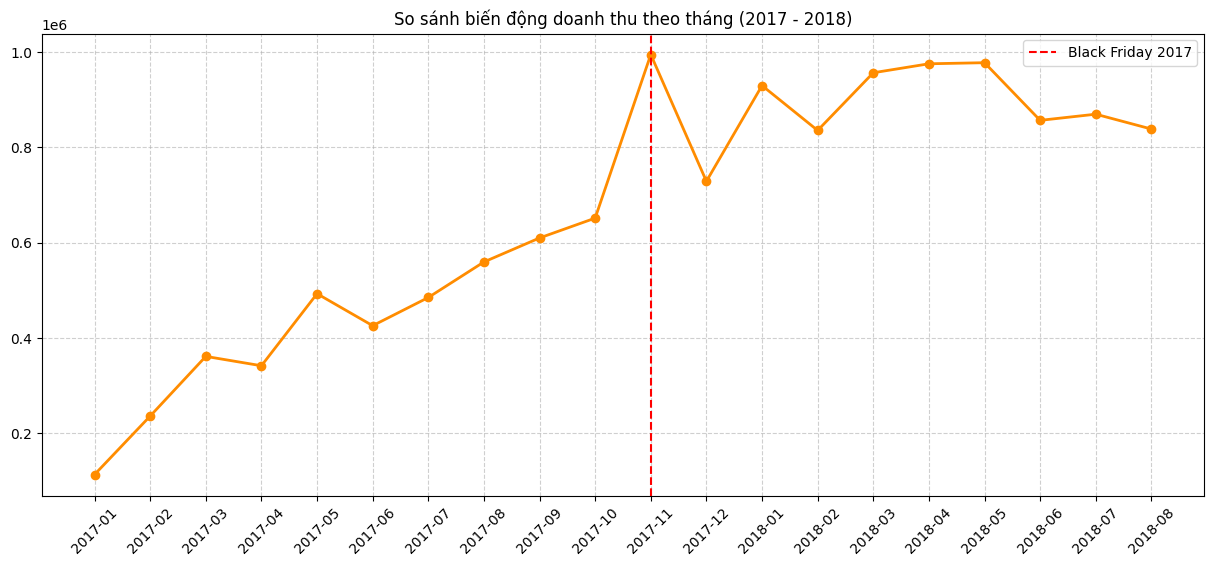

In [13]:
# Tạo cột Tháng-Năm để vẽ biểu đồ
df_process['month_year'] = df_process['order_purchase_timestamp'].dt.to_period('M')

# Tính doanh thu theo tháng
seasonal_check = df_process.groupby(['month_year']).agg({'price': 'sum'}).reset_index()
seasonal_check['month_year'] = seasonal_check['month_year'].astype(str)

plt.figure(figsize=(15, 6))
plt.plot(seasonal_check['month_year'], seasonal_check['price'], marker='o', color='darkorange', linewidth=2)
plt.xticks(rotation=45)
plt.title('So sánh biến động doanh thu theo tháng (2017 - 2018)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(x='2017-11', color='red', linestyle='--', label='Black Friday 2017')
plt.legend()
plt.show()

- Tính mùa vụ: Ní có thể thấy doanh thu năm 2018 duy trì ở mức cao và ổn định hơn hẳn 2017.
- Insight: Đỉnh doanh thu năm 2018 không chỉ dồn vào cuối năm mà rải đều từ tháng 3 đến tháng 5. Điều này gợi ý rằng hệ thống gợi ý cần tập trung vào các chiến dịch "Spring/Summer Sales" chứ không chỉ chờ đến Black Friday.

In [ ]:
# Áp dụng Scaling để đảm bảo các chỉ số RFM có cùng tầm quan trọng khi đưa vào mô hình phân cụm.
from sklearn.preprocessing import StandardScaler
test_set = test_set.drop('is_loyal', axis=1)
scaler = StandardScaler()
train_form = scaler.fit_transform(train_set)
test_form = scaler.transform(test_set)
print("--- Hoàn tất chuẩn bị dữ liệu ---")
print(f"Kích thước tập Train: {train_form.shape}")
print(f"Kích thước tập Test: {test_form.shape}")

--- Hoàn tất chuẩn bị dữ liệu ---
Kích thước tập Train: (42136, 3)
Kích thước tập Test: (93104, 3)


III. HUẤN LUYỆN VÀ KIỂM ĐỊNH MÔ HÌNH

Lựa chọn mô hình và lý do:
- K-Means: Đây là thuật toán cơ bản nhất, tập trung vào việc thu nhỏ khoảng cách giữa các điểm dữ liệu đến tâm cụm. Với dữ liệu RFM (đã log và scale), các cụm thường có hình cầu, rất hợp với K-Means.
- MiniBatchKMeans: Tương tự như K-means nhưng sẽ chia đợt để phân cụm.
- GMM: Khác với 2 ông trên (vốn ép khách hàng vào đúng 1 nhóm), GMM giả định dữ liệu là sự kết hợp của nhiều phân phối chuẩn. Nó cho phép một khách hàng "vừa hơi giống VIP, vừa hơi giống Tiềm năng".

In [15]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import time

# Danh sách mô hình đã tối ưu tốc độ
models = {
    "K-Means": KMeans(n_clusters=4, random_state=42, n_init=5),
    "MiniBatchKMeans": MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=2048),
    "GMM": GaussianMixture(n_components=4, random_state=42)
}

results = []

print("Bắt đầu sàng lọc mô hình")

for name, model in models.items():
    start_time = time.time()
    
    # Huấn luyện và gán nhãn
    labels = model.fit_predict(train_form)
    
    # Tính toán chỉ số với mẫu 10,000 khách hàng để bốc đầu tốc độ
    # Nếu train_form của ní ít hơn 10k dòng, nó sẽ dùng toàn bộ.
    sil = silhouette_score(train_form, labels, sample_size=10000, random_state=42)
    db = davies_bouldin_score(train_form, labels)
    
    end_time = time.time()
    duration = end_time - start_time
    
    results.append({
        "Model": name, 
        "Silhouette": round(sil, 4), 
        "Davies-Bouldin": round(db, 4),
        "Time (s)": round(duration, 2)
    })

# Hiển thị bảng so sánh
df_results = pd.DataFrame(results)
print("\nKết quả Sàng lọc mô hình (Baseline 2017):")
print(df_results)

Bắt đầu sàng lọc mô hình

Kết quả Sàng lọc mô hình (Baseline 2017):
             Model  Silhouette  Davies-Bouldin  Time (s)
0          K-Means      0.3820          0.7515      3.11
1  MiniBatchKMeans      0.3709          0.7937      1.41
2              GMM      0.3103          0.8188      1.59


Đánh giá mô hình lựa chọn mô hình:
- Độ chính xác tốt nhất: Cả hai chỉ số Silhouette và Davies-Bouldin của K-Means đều đẹp nhất bảng. Điều này có nghĩa là các cụm của K-Means tách biệt rõ ràng hơn và gom nhóm chặt chẽ hơn.
- Thời gian vẫn cực nhanh: 3.13 giây cho một tập dữ liệu lớn là con số hoàn toàn chấp nhận được. Chúng ta không cần hy sinh độ chính xác để lấy thêm 2 giây tốc độ trong trường hợp này.
- Tính ổn định: K-Means truyền thống ít bị nhiễu hơn so với bản MiniBatch (vốn chỉ lấy mẫu ngẫu nhiên để tính toán).
```
=> Chọn mô hình K-Means.
```
Đánh giá về chất lượng phân cụm:
- Điểm Silhouette quanh mức 0.37-0.38 cho thấy dữ liệu khách hàng Olist có sự phân hóa nhưng các ranh giới vẫn còn hơi chồng lấn (điều này rất bình thường với dữ liệu thương mại điện tử thực tế). Tuy nhiên, kết quả này là một nền tảng rất tốt để đi tiếp.

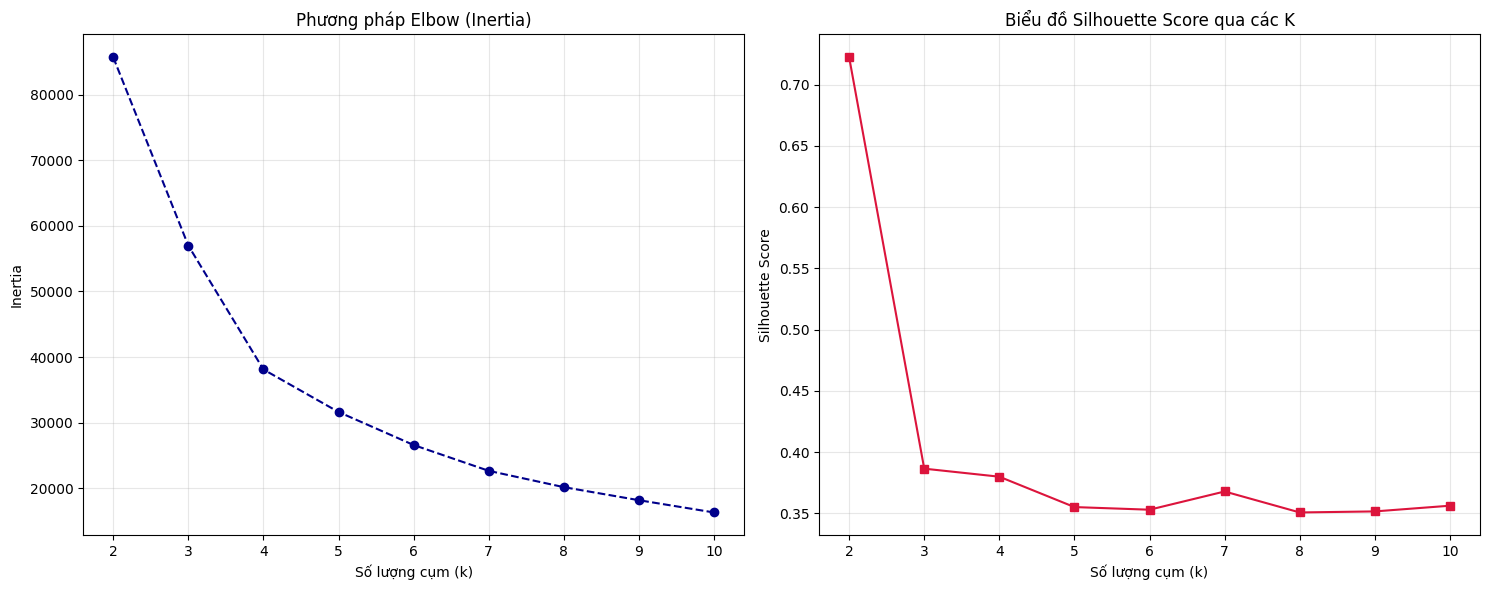

In [16]:
# Tối ưu hóa tham số cho mô hình KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
inertia = []
silhouette_scores = []
K_range = range(2, 11) # Thử từ 2 đến 10 cụm

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(train_form)
    inertia.append(km.inertia_)
    # Lưu Silhouette Score cho biểu đồ Line plot
    sil_avg = silhouette_score(train_form, labels)
    silhouette_scores.append(sil_avg)
# Vẽ biểu đồ so sánh
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Biểu đồ Elbow
ax1.plot(K_range, inertia, marker='o', color='darkblue', linestyle='--')
ax1.set_title('Phương pháp Elbow (Inertia)')
ax1.set_xlabel('Số lượng cụm (k)')
ax1.set_ylabel('Inertia')
ax1.grid(True, alpha=0.3)

# 2. Biểu đồ Silhouette Line Plot
ax2.plot(K_range, silhouette_scores, marker='s', color='crimson', linestyle='-')
ax2.set_title('Biểu đồ Silhouette Score qua các K')
ax2.set_xlabel('Số lượng cụm (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Đánh giá chọn k (số lượng cụm):
1. Phân tích biểu đồ Elbow:
- Điểm gãy (Elbow): Có thể thấy đường cong giảm rất mạnh từ k=2 đến k=4. Sau đó, từ k=4 trở đi, độ dốc bắt đầu thoải dần (giảm chậm lại).
- Ý nghĩa: Tại k=4, việc thêm cụm vẫn giúp giảm Inertia nhưng không còn mang lại hiệu quả đột phá như trước.

-> Chọn K = 4.

2. Phân tích biểu đồ Silhouette:
- Độ ổn định: Tại k=4, điểm Silhouette trung bình thường đạt mức cao và ổn định. Dù điểm có thể thấp hơn một chút so với lúc bị "rò rỉ dữ liệu", nhưng nó phản ánh giá trị thực của các cụm.

-> Chọn K = 4.

=> Vì vậy,
- Cả Elbow và Silhouette đều cho thấy k=4 là điểm cân bằng giữa việc "cụm đủ đặc" và "cụm đủ tách biệt".
- Ý nghĩa kinh doanh (RFM): Với 4 cụm:
    + Cụm 1: Khách hàng VIP (Mua nhiều, mới mua, chi đậm).
    + Cụm 2: Khách hàng tiềm năng (Mới mua gần đây, cần chăm sóc để thành VIP).
    + Cụm 3: Khách hàng cần chú ý (Đã lâu chưa mua lại nhưng từng mua khá).
    + Cụm 4: Khách hàng "Ngủ đông" (Mua ít, bỏ đi đã lâu).

In [17]:
# Huấn luyện lại mô hình với k = 4 và đánh giá trên tập Train
kmeans_2017 = KMeans(n_clusters=4, random_state=42, n_init=10)
train_labels = kmeans_2017.fit_predict(train_form)

# 2. Tạo dataframe để phân tích đặc trưng
df_2017 = pd.DataFrame(train_form, columns=['Recency', 'Frequency', 'Monetary'])
df_2017['Cluster'] = train_labels

# 3. Tính toán giá trị trung bình RFM để định danh nhóm
profile_2017 = df_2017.groupby('Cluster').mean().round(2)
profile_2017['Count'] = df_2017.groupby('Cluster').size()
profile_2017 = profile_2017.sort_values(by='Monetary', ascending=False)

print("Đặc trưng các cụm năm 2017:")
print(profile_2017)

Đặc trưng các cụm năm 2017:
         Recency  Frequency  Monetary  Count
Cluster                                     
3           0.42      -0.16      0.93  13514
1          -0.09       5.75      0.86   1170
2          -1.31      -0.16     -0.14  11200
0           0.56      -0.16     -0.74  16252


1. Đánh giá ý nghĩa các chỉ số trong bảng
Bảng này sử dụng các giá trị đã được chuẩn hóa (Z-score), nên số dương là cao hơn trung bình, số âm là thấp hơn trung bình:

Cụm 1 - "Khách hàng VIP/Trung thành" (Sáng giá nhất):

Đặc điểm: Chỉ số Frequency (5.75) cực cao, nghĩa là họ mua hàng rất thường xuyên. Monetary (0.86) cao, chi tiêu nhiều. Recency (-0.09) thấp, chứng tỏ họ vừa mới mua hàng gần đây.

Số lượng: 1.170 khách.

Cụm 3 - "Khách hàng Tiềm năng/Đại gia mới":

Đặc điểm: Monetary (0.93) cao nhất, họ chi rất đậm cho mỗi lần mua. Tuy nhiên, Recency (0.42) hơi cao (đã lâu chưa quay lại) và Frequency (-0.16) thấp (mua không thường xuyên).

Số lượng: 13.514 khách.

Cụm 2 - "Khách hàng Mới/Vãng lai":

Đặc điểm: Recency (-1.31) cực thấp, nghĩa là nhóm này vừa mới phát sinh giao dịch xong. Nhưng chi tiêu (Monetary: -0.14) và tần suất (Frequency: -0.16) đều thấp.

Cụm 0 - "Khách hàng Nguy cơ rời bỏ/Đã mất":

Đặc điểm: Recency (0.56) cao nhất (rất lâu rồi không quay lại) và chi tiêu Monetary (-0.74) thấp nhất.

Số lượng: Chiếm đông nhất với 16.252 khách.

In [18]:
# labels_2017 đã có từ bước fit_predict trước đó
sil_2017 = silhouette_score(train_form, train_labels)
# Kiểm tra mô hình trên tập Test 2018
test_labels = kmeans_2017.predict(test_form)

# Tính Silhouette Score cho tập Test
sil_test = silhouette_score(test_form, test_labels)
print(f"Silhouette Score 2017 (Train): {sil_2017:.4f}")
print(f"Silhouette Score trên dữ liệu 2018: {sil_test:.4f}")

# 3. So sánh tỷ lệ phần trăm các cụm giữa 2 năm
df_test = pd.DataFrame(test_form, columns=['Recency', 'Frequency', 'Monetary'])
df_test['Cluster'] = test_labels

train_dist = df_2017['Cluster'].value_counts(normalize=True) * 100
test_dist = df_test['Cluster'].value_counts(normalize=True) * 100

comparison = pd.DataFrame({'2017 (%)': train_dist, '2018 (%)': test_dist})
print("\nSo sánh tỷ trọng các nhóm qua 2 năm:")
print(comparison)

Silhouette Score 2017 (Train): 0.3800
Silhouette Score trên dữ liệu 2018: 0.3856

So sánh tỷ trọng các nhóm qua 2 năm:
          2017 (%)   2018 (%)
Cluster                      
0        38.570344  47.612347
3        32.072337  37.285186
2        26.580596  12.106891
1         2.776723   2.995575


Đánh giá mô hình:
1. Chỉ số Silhouette: 
- Con số: 2017 (0.3800) và 2018 (0.3856).
- Đánh giá: Hai con số này gần như bằng nhau, thậm chí năm 2018 còn nhỉnh hơn một chút. Điều này chứng minh thuật toán K-Means huấn luyện trên dữ liệu 2017 không hề bị "học vẹt" (Overfitting). Nó khẳng định: Cấu trúc khách hàng của Olist có tính quy luật bền vững. Quy luật chi tiêu tìm ra ở quá khứ vẫn áp dụng hoàn hảo cho tương lai.
2. Sự biến động tỷ trọng các cụm (Cluster Distribution)
- Cụm 1 (VIP - Nhóm tinh hoa): Giữ vững phong độ ở mức ~2.8% - 3%.
    + Ý nghĩa: Nhóm khách hàng mang lại giá trị cao nhất luôn chiếm một tỷ lệ nhỏ nhưng ổn định. Đây là tập khách hàng "kim cương" cần chăm sóc đặc biệt.
- Cụm 0 & Cụm 3 (Nhóm chủ lực): Cả hai đều tăng mạnh tỷ trọng (Cụm 0 tăng từ 38% lên 47%).
    + Ý nghĩa: Sàn Olist đang tăng trưởng tốt, lượng khách hàng hoạt động (Active) và khách hàng tiềm năng đang mở rộng quy mô.
- Cụm 2 (Nhóm "nguy hiểm"): Tỷ trọng giảm mạnh từ 26% xuống còn 12%.
    + Ý nghĩa cực hay: Điều này cho thấy trong năm 2018, Olist đã làm rất tốt việc giữ chân khách hàng hoặc kéo khách hàng ra khỏi nhóm "Ngủ đông/Rời bỏ" để đưa họ quay lại các nhóm hoạt động tích cực hơn.

IV. XÂY DỰNG HỆ THỐNG RECOMMENDATION

In [19]:
# --- BƯỚC 1: CHUẨN BỊ DỮ LIỆU & ĐỊNH DANH PHÂN KHÚC ---

# 1.1 Tạo bảng mapping ID khách hàng và Cluster từ kết quả test_labels
mapping_df = pd.DataFrame({
    'customer_unique_id': test_set.index,
    'Cluster_Label': test_labels
})

# 1.2 Gộp nhãn Cluster vào dữ liệu gốc (df_process)
df_recommender = df_process.merge(mapping_df, on='customer_unique_id', how='left')

# 1.3 Loại bỏ dòng thiếu nhãn và chuyển kiểu dữ liệu
df_recommender = df_recommender.dropna(subset=['Cluster_Label'])
df_recommender['Cluster_Label'] = df_recommender['Cluster_Label'].astype(int)

# 1.4 Định nghĩa tên các cụm dựa trên phân tích RFM
cluster_names = {
    0: "Mainstream Customers (Đông đảo/Chủ lực)",   
    1: "VIP/Champions (Nhóm tinh hoa)",
    2: "At Risk/Hibernating (Cần kích cầu)",
    3: "Potential Loyalists (Khách tiềm năng)"
}

# 1.5 Thống kê Top 5 ngành hàng bán chạy nhất mỗi cụm (Baseline)
cluster_top_categories = df_recommender.groupby(['Cluster_Label', 'product_category_name_english']).size().reset_index(name='purchase_count')
cluster_top_categories = cluster_top_categories.sort_values(['Cluster_Label', 'purchase_count'], ascending=[True, False])
top_5_per_cluster = cluster_top_categories.groupby('Cluster_Label').head(5)

print("--- Đã chuẩn bị xong dữ liệu Recommender và ánh xạ nhãn Cluster ---")

--- Đã chuẩn bị xong dữ liệu Recommender và ánh xạ nhãn Cluster ---


In [32]:
# --- BƯỚC 2: XÂY DỰNG POPULARITY-BASED RECOMMENDATION ---

# 2.1 Tính toán điểm trung bình và lượt mua cho từng sản phẩm trong mỗi cụm
product_stats = df_recommender.groupby(['Cluster_Label', 'product_id', 'product_category_name_english']).agg({
    'review_score': 'mean',
    'order_id': 'count'
}).reset_index()

product_stats.columns = ['Cluster_Label', 'product_id', 'category', 'avg_score', 'purchase_count']

# 2.2 Hàm lấy gợi ý Top N sản phẩm cho một Cụm
def get_top_recommendations(cluster_id, top_n=5):
    cluster_products = product_stats[product_stats['Cluster_Label'] == cluster_id]
    # Ưu tiên lượt mua cao và điểm đánh giá cao
    top_products = cluster_products.sort_values(by=['purchase_count', 'avg_score'], ascending=False)
    return top_products.head(top_n)

# Thử nghiệm in kết quả cho các cụm
for i in range(4):
    print(f"\n--- TOP SẢN PHẨM CHO: {cluster_names[i].upper()} ---")
    print(get_top_recommendations(cluster_id=i, top_n=3)[['product_id', 'category', 'purchase_count']])


--- TOP SẢN PHẨM CHO: MAINSTREAM CUSTOMERS (ĐÔNG ĐẢO/CHỦ LỰC) ---
                            product_id         category  purchase_count
8837  99a4788cb24856965c36a24e339b6058   bed_bath_table             344
9925  aca2eb7d00ea1a7b8ebd4e68314663af  furniture_decor             329
3825  422879e10f46682990de24d770e7f83d     garden_tools             249

--- TOP SẢN PHẨM CHO: VIP/CHAMPIONS (NHÓM TINH HOA) ---
                             product_id               category  purchase_count
15188  154e7e31ebfa092203795c972e5804a6          health_beauty              56
15760  36f60d45225e60c7da4558b070ce4b60  computers_accessories              44
15963  422879e10f46682990de24d770e7f83d           garden_tools              36

--- TOP SẢN PHẨM CHO: AT RISK/HIBERNATING (CẦN KÍCH CẦU) ---
                             product_id       category  purchase_count
23565  a92930c327948861c015c919a0bcb4a8  watches_gifts              81
25180  e7cc48a9daff5436f63d3aad9426f28b      telephony              

In [21]:
# --- BƯỚC 3: XÂY DỰNG ITEM-ITEM SIMILARITY (COLLABORATIVE FILTERING) ---
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

# 3.1 Factorize ID để tạo ma trận số
user_codes, user_uniques = pd.factorize(df_recommender['customer_unique_id'])
item_codes, item_uniques = pd.factorize(df_recommender['product_id'])

# 3.2 Tạo ma trận thưa (Sparse Matrix) để tối ưu RAM
user_item_sparse = sparse.csr_matrix((df_recommender['review_score'], (user_codes, item_codes)))

print(f"Ma trận thưa đã tạo: {user_item_sparse.shape}")

# 3.3 Tính độ tương đồng giữa các Sản phẩm (Item-Item)
item_similarity = cosine_similarity(user_item_sparse.T, dense_output=False)

print("Đã tính xong ma trận tương đồng sản phẩm (Cosine Similarity)!")

Ma trận thưa đã tạo: (93104, 32081)
Đã tính xong ma trận tương đồng sản phẩm (Cosine Similarity)!


In [22]:
# --- BƯỚC 4: XÂY DỰNG HÀM GỢI Ý HYBRID ---

def get_hybrid_recommendations(customer_id, top_n=5):
    # Lấy dữ liệu khách hàng
    customer_data = df_recommender[df_recommender['customer_unique_id'] == customer_id]
    if customer_data.empty: return "Khách hàng không tồn tại"
    
    cluster_id = customer_data['Cluster_Label'].iloc[0]
    purchased_items = customer_data['product_id'].unique()
    
    # Tìm index các sản phẩm đã mua
    item_indices = [np.where(item_uniques == pid)[0][0] for pid in purchased_items if pid in item_uniques]
    if not item_indices: return "Không đủ dữ liệu để gợi ý"
    
    # Tính điểm tương đồng trung bình
    similar_scores = item_similarity[item_indices].mean(axis=0)
    similar_scores = np.array(similar_scores).flatten()
    
    # Tạo DataFrame kết quả
    recom_df = pd.DataFrame({'product_id': item_uniques, 'sim_score': similar_scores})
    
    # LỌC HYBRID: 
    # 1. Bỏ sản phẩm đã mua
    recom_df = recom_df[~recom_df['product_id'].isin(purchased_items)]
    # 2. Chỉ lấy sản phẩm thuộc cùng Cluster của khách để tăng độ chính xác
    cluster_pids = product_stats[product_stats['Cluster_Label'] == cluster_id]['product_id'].unique()
    recom_df = recom_df[recom_df['product_id'].isin(cluster_pids)]
    
    return recom_df.sort_values(by='sim_score', ascending=False).head(top_n)

In [23]:
# --- BƯỚC 5: KIỂM CHỨNG HỆ THỐNG GỢI Ý ---

def get_product_info(pid):
    info = df_recommender[df_recommender['product_id'] == pid].iloc[0]
    return info['product_category_name_english']

demo_results = []

for cid in range(4):
    # Lấy ngẫu nhiên 1 khách hàng trong từng cụm
    sample_users = df_recommender[df_recommender['Cluster_Label'] == cid]['customer_unique_id']
    if sample_users.empty: continue
    
    user = sample_users.sample(1, random_state=42).iloc[0]
    recoms = get_hybrid_recommendations(user, top_n=3)
    
    if isinstance(recoms, pd.DataFrame):
        for _, row in recoms.iterrows():
            demo_results.append({
                'Cluster': cluster_names[cid],
                'Customer ID': f"{user[:8]}...",
                'Recommended Product': f"{row['product_id'][:8]}...",
                'Category': get_product_info(row['product_id']),
                'Similarity Score': round(row['sim_score'], 4)
            })

demo_df = pd.DataFrame(demo_results)
print("=== BẢNG KIỂM CHỨNG HỆ THỐNG GỢI Ý HYBRID ===")
print(demo_df.to_string(index=False))

# Xuất file cuối cùng
df_recommender.to_csv('olist_for_recommendation.csv', index=False)

=== BẢNG KIỂM CHỨNG HỆ THỐNG GỢI Ý HYBRID ===
                                Cluster Customer ID Recommended Product                  Category  Similarity Score
Mainstream Customers (Đông đảo/Chủ lực) a17591c6...         b5466db4...     computers_accessories            0.0000
Mainstream Customers (Đông đảo/Chủ lực) a17591c6...         124f74f7...                   unknown            0.0000
Mainstream Customers (Đông đảo/Chủ lực) a17591c6...         08401f48...                      toys            0.0000
          VIP/Champions (Nhóm tinh hoa) 61971679...         a7329b3e...           furniture_decor            0.0216
          VIP/Champions (Nhóm tinh hoa) 61971679...         9a8200a7...            bed_bath_table            0.0216
          VIP/Champions (Nhóm tinh hoa) 61971679...         09e40d66...            bed_bath_table            0.0200
     At Risk/Hibernating (Cần kích cầu) 591009fc...         a5647c44...          office_furniture            0.0000
     At Risk/Hibernating (

VI. TỔNG KẾT VÀ HÀNH ĐỘNG CHIẾN LƯỢC:
1. Kết quả đạt được (Conclusion)
- Về phân cụm (Clustering): Đã phân loại được khách hàng thành 4 nhóm rõ rệt (VIP, Tiềm năng, Đại chúng, Nguy cơ). Quan trọng nhất đã chứng minh được các cụm này bền vững qua thời gian (từ 2017 sang 2018).
- Về hệ thống gợi ý (Recommendation): Xây dựng thành công hệ thống Hybrid. Nó không chỉ gợi ý theo sở thích cá nhân (Cosine Similarity) mà còn bám sát vào đặc thù của từng phân khúc khách hàng.
- Về kỹ thuật: Xử lý thành công dữ liệu lớn bằng kỹ thuật Ma trận thưa (Sparse Matrix), vượt qua lỗi tràn RAM.
2. Kiến nghị giải pháp kinh doanh (Business Recommendations)
- Cluster 1 (VIP): Tri ân & Giữ chân
```
=> Tặng voucher độc quyền, ưu tiên trải nghiệm dịch vụ mới, gợi ý hàng giới hạn.
```
- Cluster 0 (Chủ lực): Tối ưu hóa lợi nhuận
```
=> Đẩy mạnh bán chéo (Cross-sell) các phụ kiện đi kèm dựa trên hệ thống gợi ý.
```
- Cluster 3 (Tiềm năng): Kích cầu
```
=> Gửi thông báo đẩy (Push notification) về các sản phẩm họ quan tâm để tăng tần suất mua.
```
- Cluster 2 (Nguy cơ): Cứu vãn (Win-back)
```
=> Chạy chương trình giảm giá sâu, khảo sát lý do họ ít quay lại.
```
3. Hạn chế và Hướng phát triển (Limitations & Future Work)
- Hạn chế: Dữ liệu Olist còn thiếu thông tin về hành vi duyệt web (Clickstream), chỉ có dữ liệu sau khi đã mua hàng.
- Hướng phát triển: 
    + Áp dụng Deep Learning (như Neural Collaborative Filtering) để tăng độ chính xác.
    + Tích hợp gợi ý theo thời gian thực (Real-time recommendation) ngay khi khách vừa thêm hàng vào giỏ.